In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")

1º Identificar variable dependiente e independientes  
2º Identificar el tipo de la variable dependiente para elegir:  
- Regresión (Precio de la vivienda): nulos, estandarización, outliersy encoding  
- Casificación (Tener cáncer o no): nulos, estandarización, outliers, encoding y desbalance
3º visualizar:  
- Las numéricas (su distribución, histplot)  
- Las categóricas  
- Los outliers (boxplots)  
- Las correlaciones (Heatmap)  
- Observar las diferencias entre las categorías de una variable categórica evaluada en la variable dependiente (ejey la depependiente en un barplot)  
- Observar las diferencias entre numericas evaluada en la variable dependiente (scatterplot)

1º EDA  
1.2º DUPLICADOS  
2º NULOS  
3º OUTLIERS  
4º ENCODING  

In [2]:
df_shop=pd.read_csv("datos\online_shoppers_intention_clase.csv", index_col=0)
nomb_columns={col:col.replace("_", "") for col in df_shop.columns}
df_shop.rename(columns=nomb_columns, inplace=True)

In [3]:
df_shop.head(3)

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative,ProductRelated,BounceRates
0,0.0,0.0,0.0,0.0,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,0.0,1.0,0.2
1,0.0,0.0,0.0,64.0,2.095621,0.0,Feb,Windows,Google Chrome,Region1,OT,Returning_Visitor,0.0,2.0,0.0
2,0.0,0.0,0.0,0.0,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,RT,NaN,NaN,1.0,NaN


In [4]:
f.exploracion_dataframe(df_shop, "PageValues")

El número de datos es 12330 y el de columnas es 15

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 66

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Month,0.997567
Region,15.004055
TrafficType,0.145985
VisitorType,4.995945
Administrative,10.000000
ProductRelated,9.002433
BounceRates,12.798054



 ..................... 

Los tipos de las columnas son:


,tipo_dato
AdministrativeDuration,float64
Informational,float64
InformationalDuration,float64
ProductRelatedDuration,float64
ExitRates,float64
PageValues,float64
Month,object
OperatingSystems,object
Browser,object
Region,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna MONTH tiene las siguientes valore únicos:


,count
Month,
May,3337
Nov,2966
Mar,1887
Dec,1704
Oct,542


La columna OPERATINGSYSTEMS tiene las siguientes valore únicos:


,count
OperatingSystems,
Windows,6601
MacOS,2585
Linux,2555
iOS,478
Android,98


La columna BROWSER tiene las siguientes valore únicos:


,count
Browser,
Google Chrome,7961
Mozilla Firefox,2462
Safari,736
Microsoft Edge,467
Opera,174


La columna REGION tiene las siguientes valore únicos:


,count
Region,
Region1,3698
Region3,1803
Unknown,1035
Region4,933
Region2,864


La columna TRAFFICTYPE tiene las siguientes valore únicos:


,count
TrafficType,
OT,3821
DT,2400
RT,2014
SMT,1050
PMCT,720


La columna VISITORTYPE tiene las siguientes valore únicos:


,count
VisitorType,
Returning_Visitor,10125
New_Visitor,1511
Other,78


Queremos sacar un subplot con todas las numericas

In [5]:
df_numericas, df_categoricas=f.separar_dataframe(df_shop)

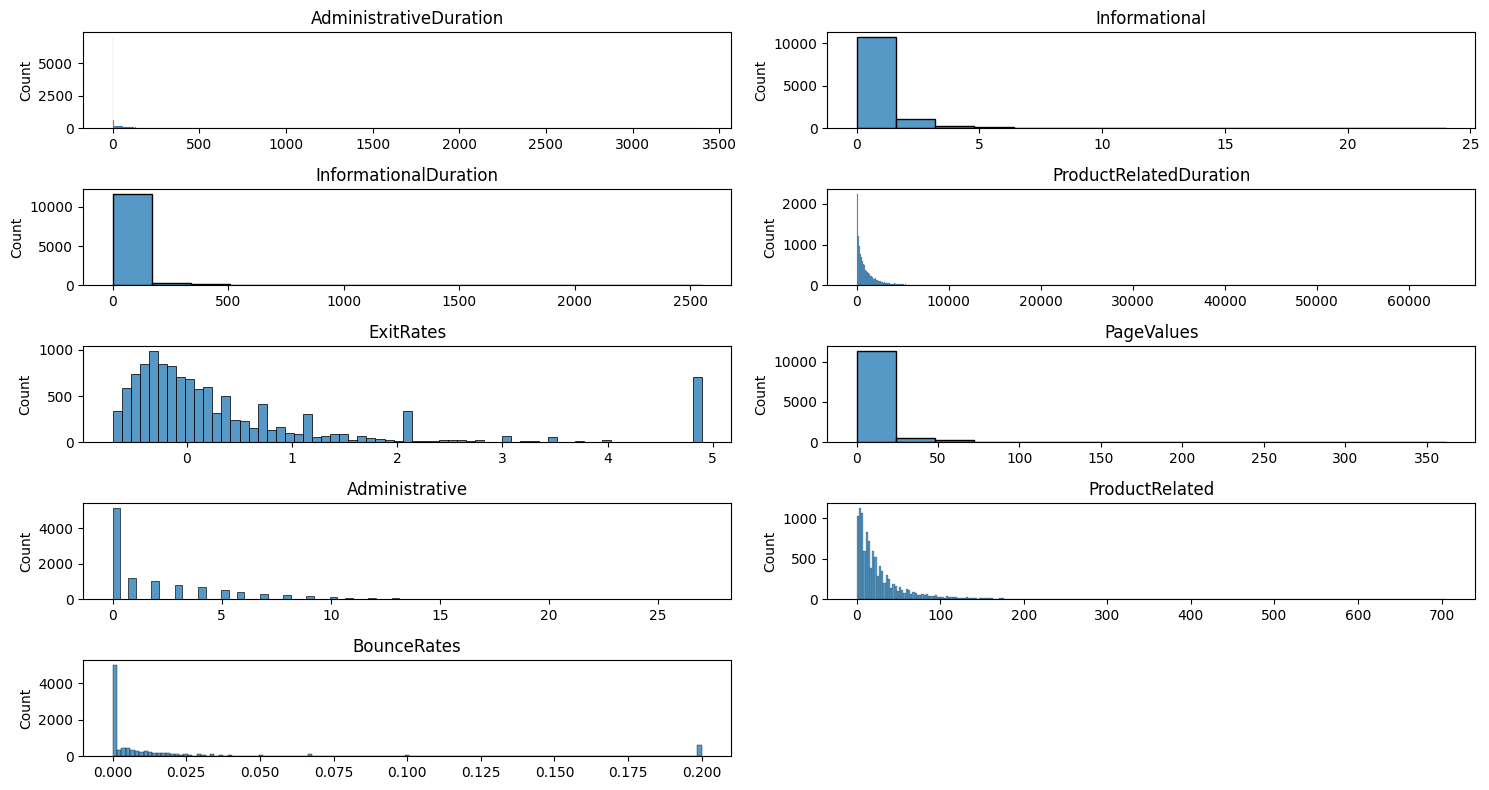

In [6]:
f.plot_numericas(df_numericas, (15,8))

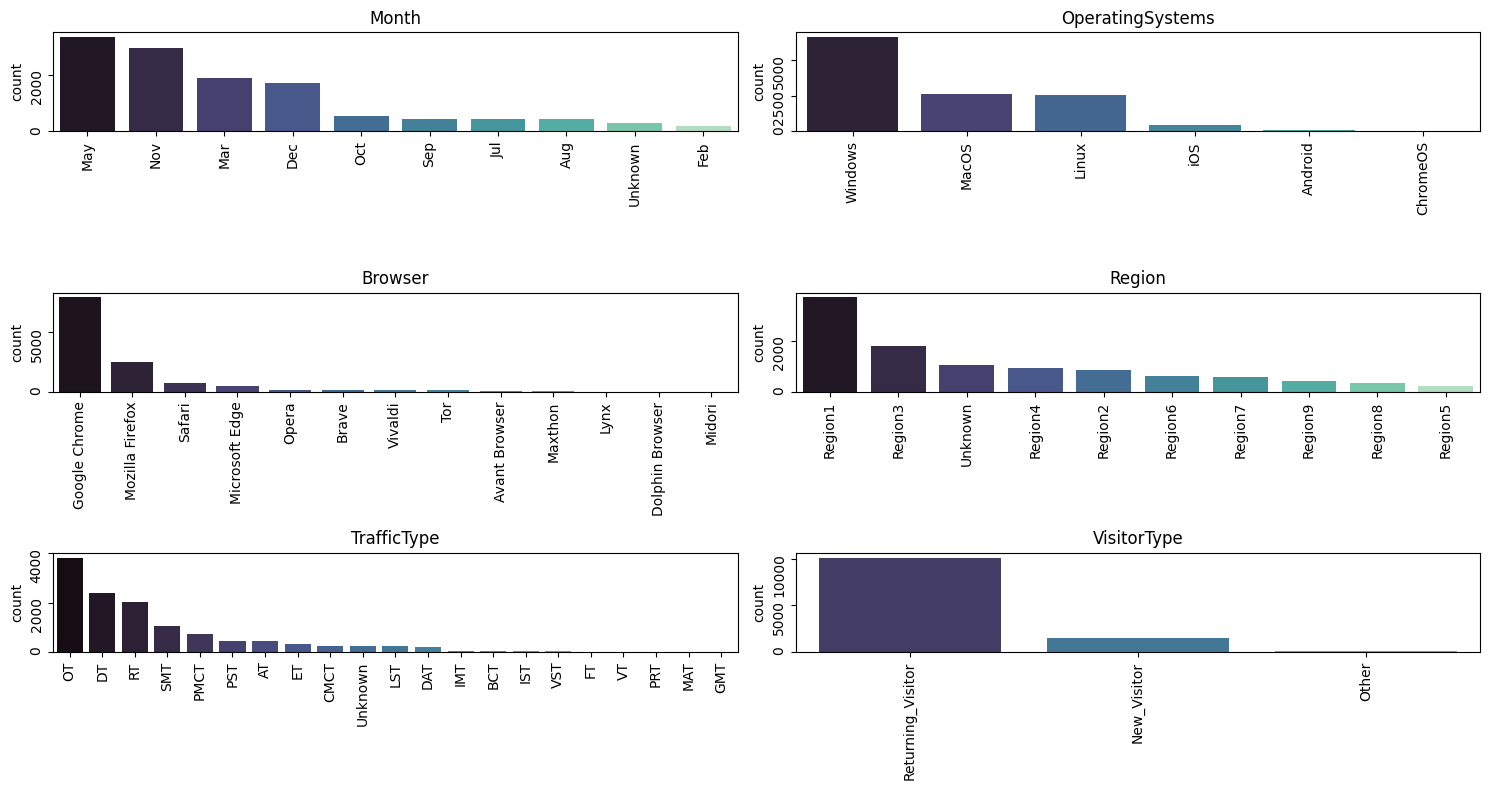

In [7]:
f.plot_categoricas(df_categoricas, (15,8))

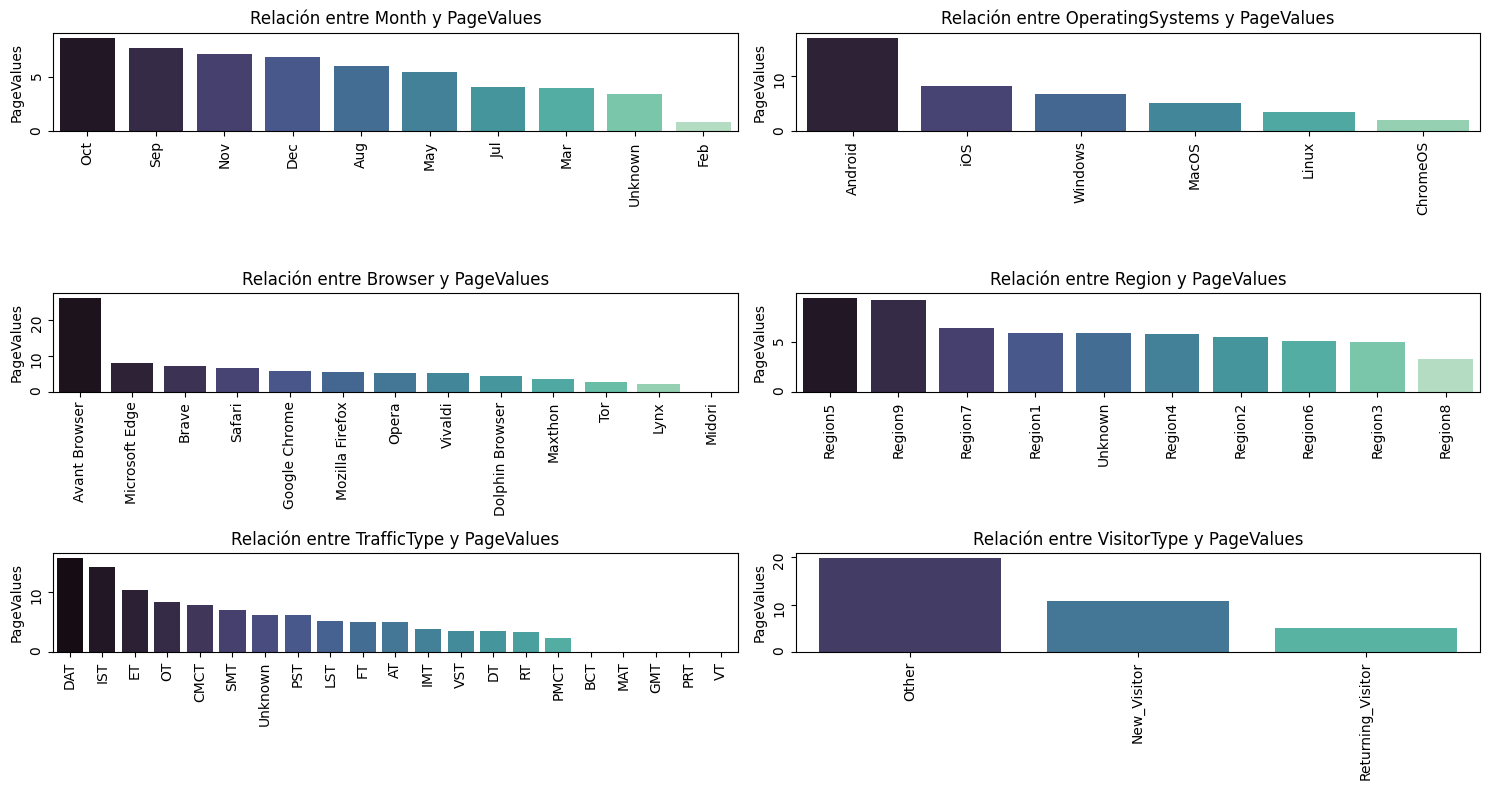

In [8]:

f.relacion_dependiente_categoricas(df_shop,"PageValues")        

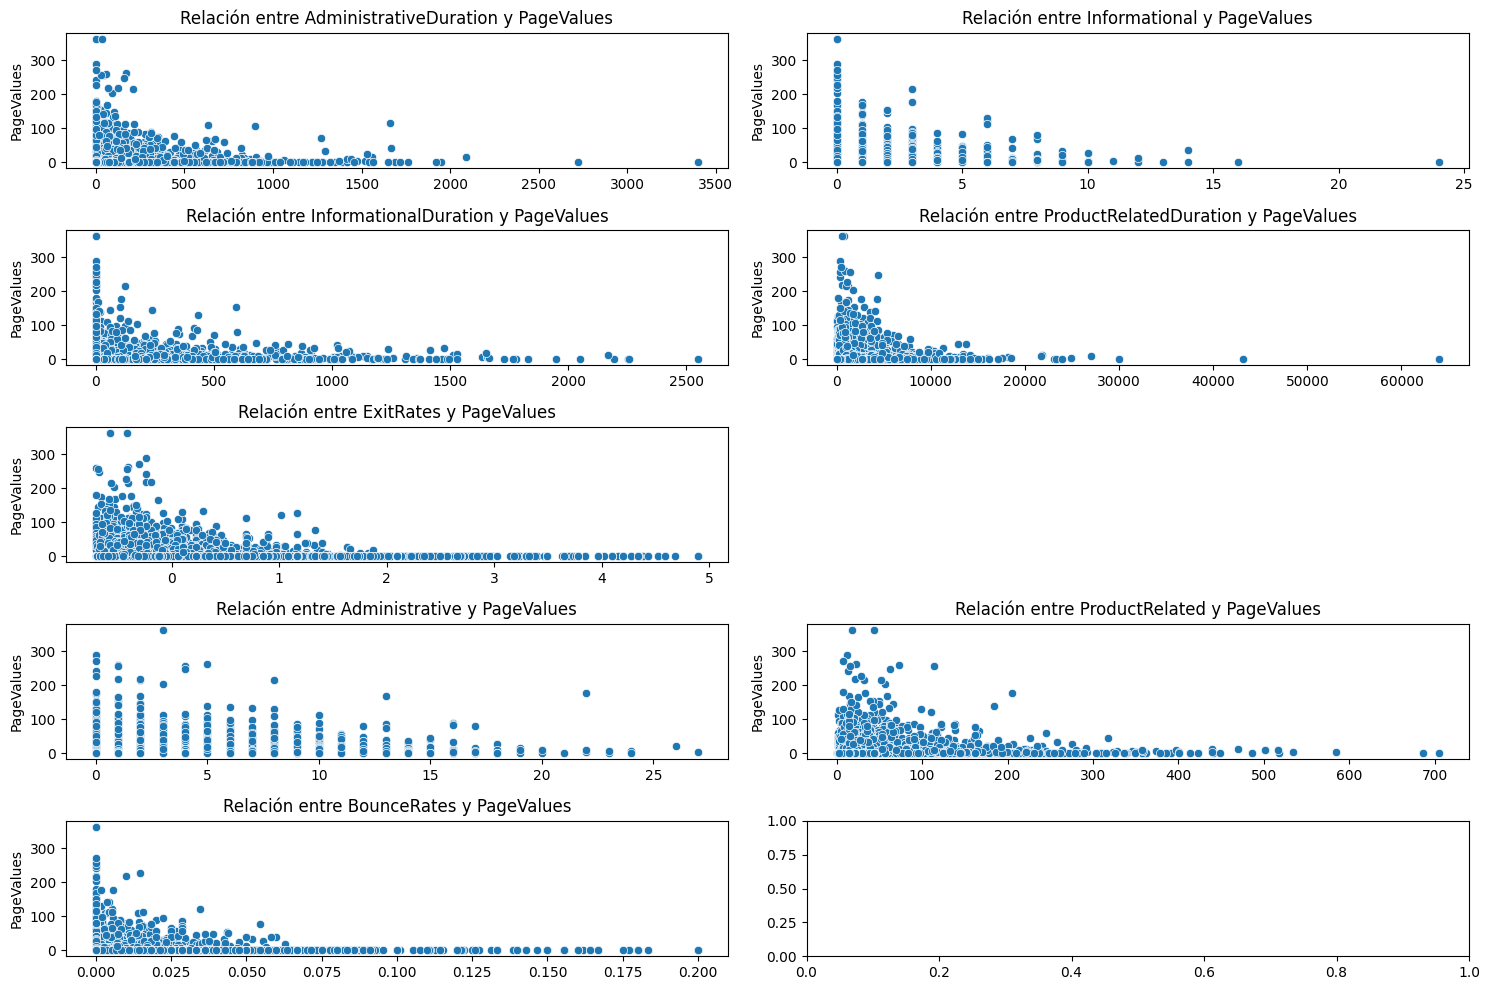

In [9]:
f.relacion_dependiente_numericas(df_shop, "PageValues", (15,10))

In [10]:
df_shop.corr(numeric_only=True)

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative,ProductRelated,BounceRates
AdministrativeDuration,1.000000,0.134646,0.107682,0.203590,-0.169493,0.046636,0.349992,0.151350,-0.121080
Informational,0.134646,1.000000,0.618955,0.387505,-0.163666,0.048632,0.375411,0.372975,-0.115686
InformationalDuration,0.107682,0.618955,1.000000,0.347364,-0.105276,0.030861,0.253914,0.278223,-0.073391
ProductRelatedDuration,0.203590,0.387505,0.347364,1.000000,-0.251984,0.052823,0.363888,0.863631,-0.181075
ExitRates,-0.169493,-0.163666,-0.105276,-0.251984,1.000000,-0.174498,-0.318582,-0.291768,0.912511
PageValues,0.046636,0.048632,0.030861,0.052823,-0.174498,1.000000,0.096720,0.054385,-0.118748
Administrative,0.349992,0.375411,0.253914,0.363888,-0.318582,0.096720,1.000000,0.422165,-0.225360
ProductRelated,0.151350,0.372975,0.278223,0.863631,-0.291768,0.054385,0.422165,1.000000,-0.201891
BounceRates,-0.121080,-0.115686,-0.073391,-0.181075,0.912511,-0.118748,-0.225360,-0.201891,1.000000


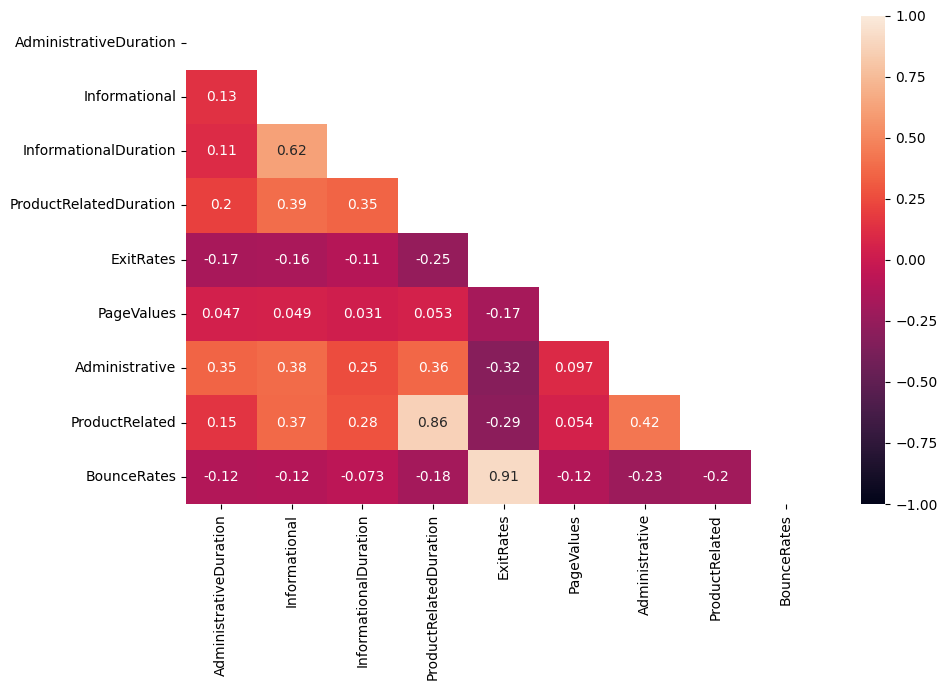

In [11]:

f.matriz_correlacion(df_shop)

Como BounceRates y ExitRates están muy correlacionadas (explican lo mismo) podemos eliminar una. ¿Cuál? pues eliminamos la que menos relación tenga con nuestra variable dependiente. Es decir la de BounceRates se podría eliminar.

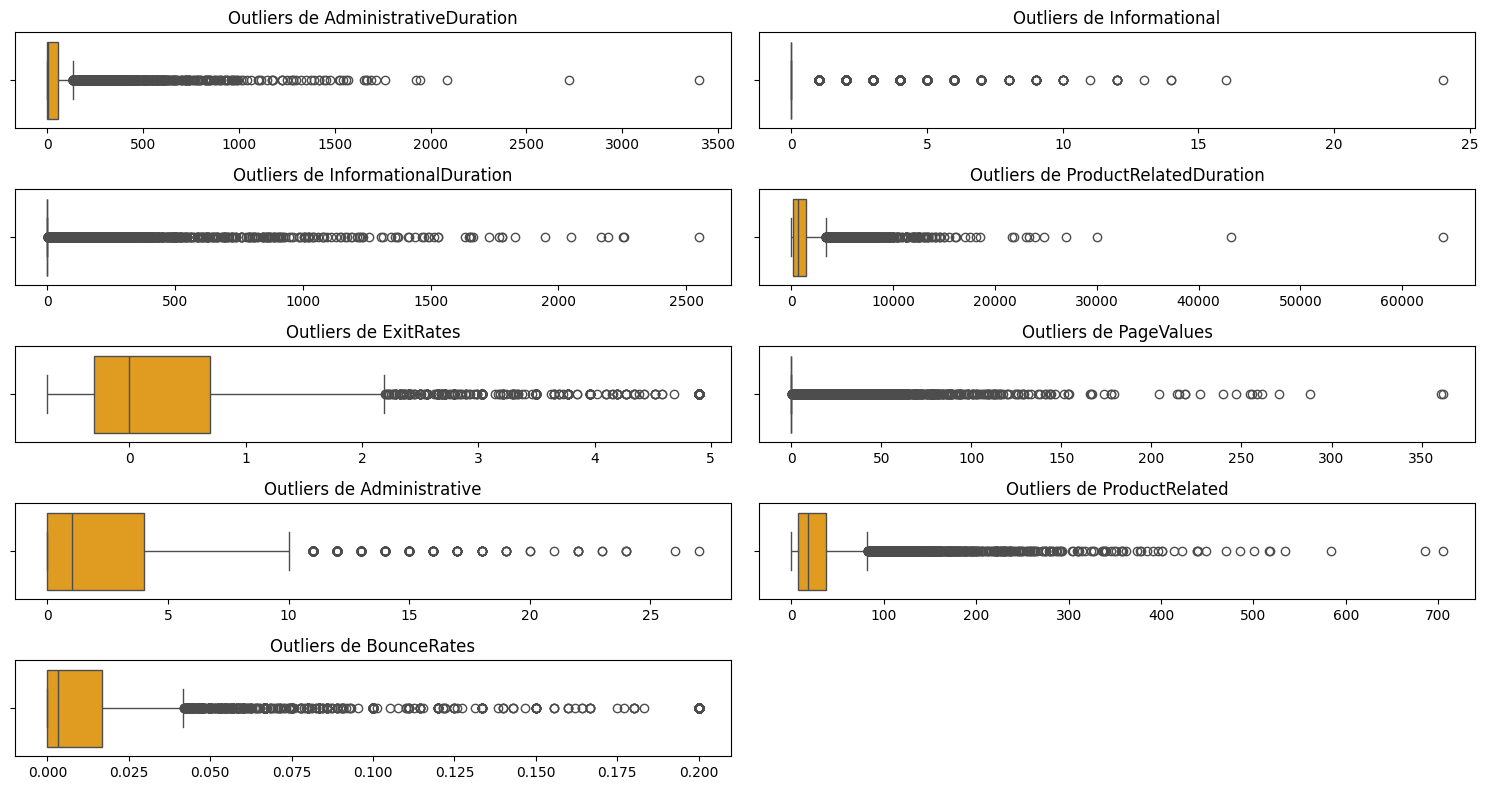

In [12]:

f.detectar_outliers(df_shop)

Ahora toca la gestión de nulos:  
- Categóricas: crear una nueva categoría   
- Numéricas usaremos Sklearn para hecer mapeo con los datos que si tenemos y poder imputar un valor

*SKlearn:*  
- Simple Imputer (es un fill na más complicado)  
- KNN Imputer (solo numéricas)  
- Iterative Imputer (solo numéricas)

**KNN Imputer**  
Hace paquetitos con la gente que más se parece basandose en toda la info que posee de las columnas (paquete de madrid con paquete de hombres y paquete de mujeres, pquete andalucía con paquete de ...). Entonces si hay un nulo para un hombre de madrid pues va y coge la media de las personas que más se parecen a ese dato nulo.

**ITERATIVE Imputer**  
Va a tratar de buscar patrones de tendencia y aplicará esa tendencia para rellenar los nulos (infiere)